<a href="https://colab.research.google.com/github/dev-kentayamada/machine-learning/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#回帰分析
単回帰式: $$\widehat{y}=b_{0}+b_{1}x_{1}$$
重回帰式: $$\widehat{y}=b_{0}+b_{1}x_{1}+b_{2}x_{2}+...+b_{n}x_{n}$$

##ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set() #seabornのデフォルトスタイルを適用)

##データを読み込む

In [2]:
!gdown --id 1ax6trdeMfcBtKwTUa7d4k7fh2pkm1Jgq #Google driveからデータをダウンロード
data = pd.read_csv('1.03. Dummies.csv')
print(data)
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0}) #ダミー変数にする
print(data.describe())

Downloading...
From: https://drive.google.com/uc?id=1ax6trdeMfcBtKwTUa7d4k7fh2pkm1Jgq
To: /content/1.03. Dummies.csv
100% 1.22k/1.22k [00:00<00:00, 1.37MB/s]
     SAT   GPA Attendance
0   1714  2.40         No
1   1664  2.52         No
2   1760  2.54         No
3   1685  2.74         No
4   1693  2.83         No
..   ...   ...        ...
79  1936  3.71        Yes
80  1810  3.71        Yes
81  1987  3.73         No
82  1962  3.76        Yes
83  2050  3.81        Yes

[84 rows x 3 columns]
               SAT        GPA  Attendance
count    84.000000  84.000000   84.000000
mean   1845.273810   3.330238    0.464286
std     104.530661   0.271617    0.501718
min    1634.000000   2.400000    0.000000
25%    1772.000000   3.190000    0.000000
50%    1846.000000   3.380000    0.000000
75%    1934.000000   3.502500    1.000000
max    2050.000000   3.810000    1.000000


##回帰分析に使うデータの指定

In [3]:
list_y = list()
list_X = list()
list_transformedX = list()

###単回帰

In [4]:
list_X.append(data['SAT'].values.reshape(-1,1)) #説明変数(２次元データにする)
list_y.append(data['GPA']) #目的変数

###重回帰

In [5]:
list_X.append(data[['SAT','Attendance']]) #説明変数
list_y.append(data['GPA']) #目的変数

##標準化

In [6]:
scaler = StandardScaler()
for X in list_X:
  scaler.fit(X)
  list_transformedX.append(scaler.transform(X))

##回帰分析の実行

|名称|意味|
|:-|:-|
|copy_X|メモリ内でデータを複製してから実行するかどうか。 (デフォルト値: True)|
|fit_intercept|False に設定すると切片を求める計算を含めない。目的変数が原点を必ず通る性質のデータを扱うときに利用。 (デフォルト値: True)|
|n_jobs|計算に使うジョブの数。-1 に設定すると、すべての CPU を使って計算します。 (デフォルト値: 1)|
|normalize|True に設定すると、説明変数を事前に正規化します。 (デフォルト値: False)|



* coef (weights)の値が大きければ大きいほど特徴量に大きな影響を与える。標準化することによってその値を正しく評価することが出来る。
* const (bias)の値は回帰モデルの位置を変化させるものなので、バイアスと呼ぶ。





 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R-squared:  0.406

Adj. R-squared:  0.399


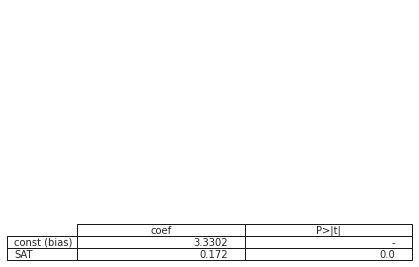






 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R-squared:  0.565

Adj. R-squared:  0.555


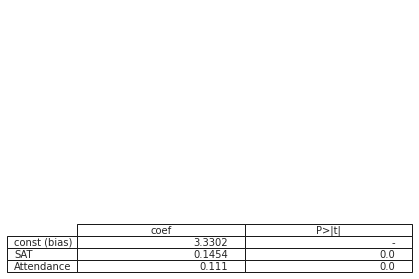

In [7]:
for X, y, colName in zip(list_transformedX, list_y, [['SAT'],['SAT','Attendance']]):
  reg = LinearRegression().fit(X, y) #回帰分析の実行
  print("\n",reg)
  rSquared = reg.score(X, y) #決定係数
  print("\nR-squared: ", round(rSquared, 3)) #小数点以下3桁 (小数点第四位を四捨五入)
  numVariable = X.shape[1] #変数の数
  numData = X.shape[0] #データの数
  adjRSquared = 1-(1-rSquared)*(numData-1)/(numData-numVariable-1) #自由度修正済み決定係数
  print("\nAdj. R-squared: ", round(adjRSquared, 3))
  fig, ax =plt.subplots(1,1)
  reg.intercept_ = round(reg.intercept_, 4) #小数点以下4桁 (小数点第五位を四捨五入)
  tableData = {
        'coef': [reg.intercept_],
        'P>|t|': ['-'],
        }
  for coef in reg.coef_:
    coef = round(coef, 4)
    tableData['coef'].append(coef)
  for pValue in f_regression(X,y)[1]:
    tableData['P>|t|'].append(round(pValue,4))
  df=pd.DataFrame(tableData)
  ax.axis('tight')
  ax.axis('off')
  rowLabels = ["const (bias)"]
  for name in colName:
    rowLabels.append(name)
  ax.table(cellText=df.values, colLabels=df.columns, rowLabels=rowLabels)
  plt.show()
  print("\n\n\n")

##計算された回帰モデル

###単回帰
$$\widehat{y}=3.3302+0.172 \times x_{1}$$
$$GPA=3.3302+0.172 \times SAT$$

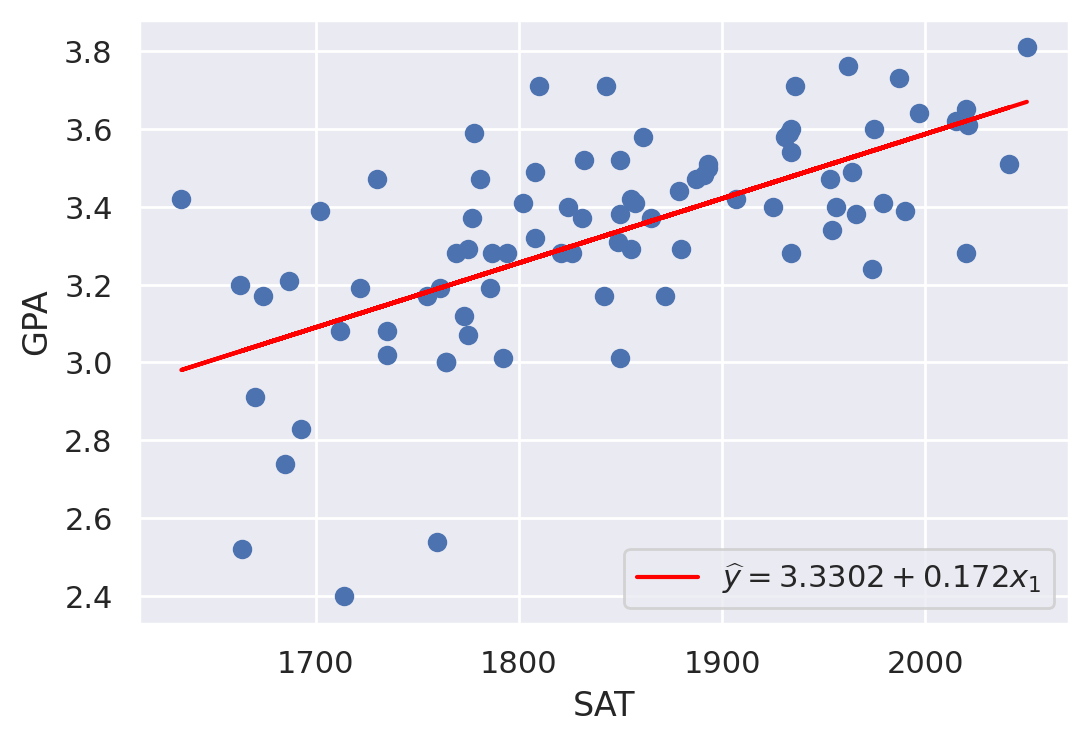

In [8]:
simple_linear_yHat = 3.3302 + 0.172 * list_transformedX[0]

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111,xlabel='SAT', ylabel='GPA')
# labelオプションで凡例に用いる曲線名を指定
ax.scatter(data['SAT'], data['GPA'])
ax.plot(data['SAT'], simple_linear_yHat, color="red", label="$\widehat{y}=3.3302+0.172x_{1}$")
# 凡例の表示
ax.legend()

###重回帰
$$\widehat{y}=3.3302+0.1454\times x_{1}+0.111\times x_{2}$$
$$GPA=3.3302+0.1454\times SAT+0.111\times Attendance(0/1)$$

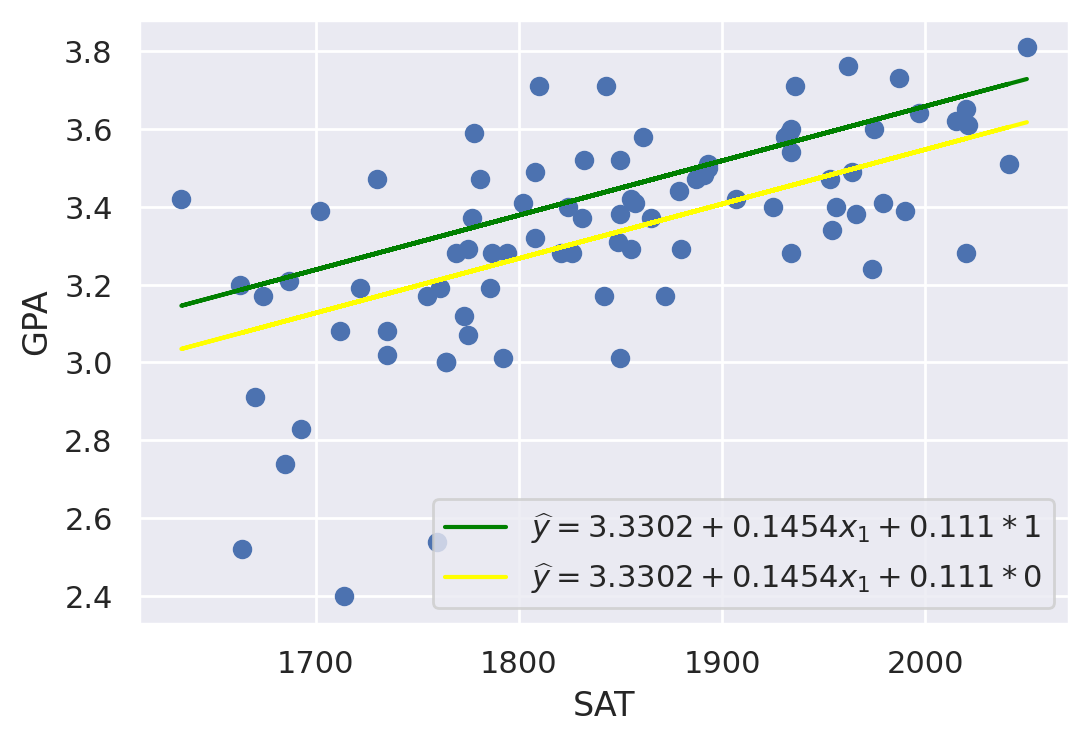

In [9]:
multiple_linear_yHat_attend = 3.3302 + 0.1454 * list_transformedX[0] + 0.111 * 1
multiple_linear_yHat_notAttend = 3.3302 + 0.1454 * list_transformedX[0] + 0.111 * 0

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111,xlabel='SAT', ylabel='GPA')
# labelオプションで凡例に用いる曲線名を指定
ax.scatter(data['SAT'], data['GPA'])
ax.plot(data['SAT'], multiple_linear_yHat_attend, color="green", label="$\widehat{y}=3.3302+0.1454x_{1}+0.111*1$")
ax.plot(data['SAT'], multiple_linear_yHat_notAttend, color="yellow", label="$\widehat{y}=3.3302+0.1454x_{1}+0.111*0$")
# 凡例の表示
ax.legend()

###まとめ

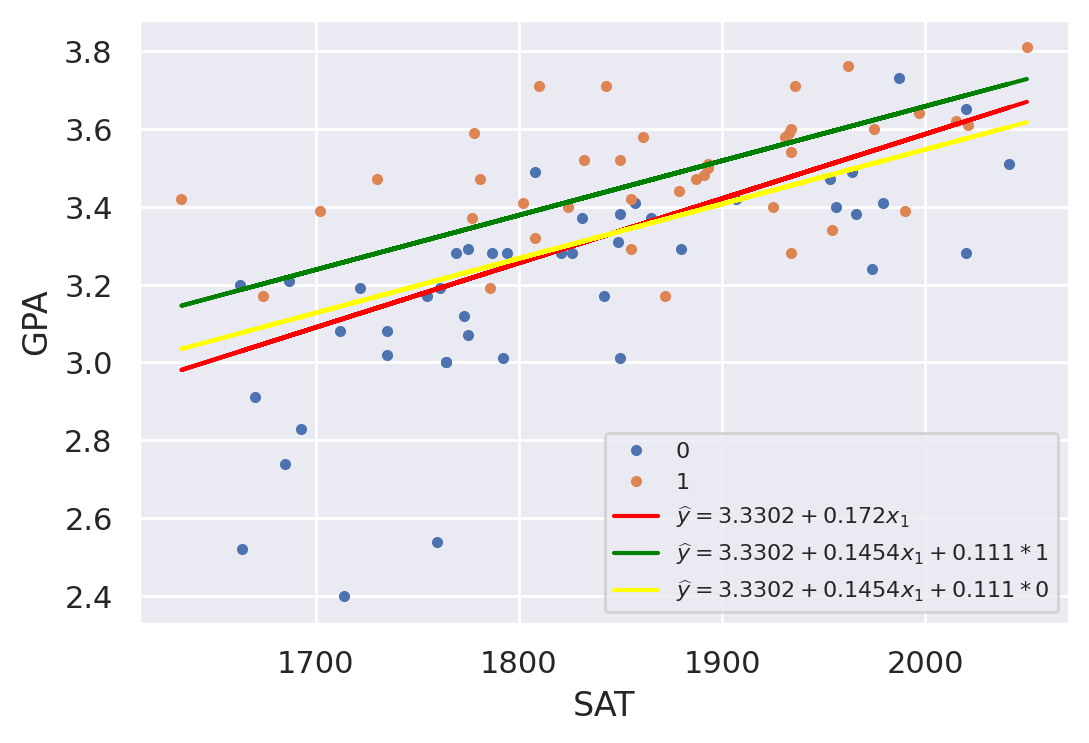

In [10]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111,xlabel='SAT', ylabel='GPA')
for name, group in data.groupby('Attendance'):
  ax.plot(group.SAT, group.GPA, marker='o', linestyle='', ms=3, label=name)
ax.plot(data['SAT'], simple_linear_yHat, color="red", label="$\widehat{y}=3.3302+0.172x_{1}$")
ax.plot(data['SAT'], multiple_linear_yHat_attend, color="green", label="$\widehat{y}=3.3302+0.1454x_{1}+0.111*1$")
ax.plot(data['SAT'], multiple_linear_yHat_notAttend, color="yellow", label="$\widehat{y}=3.3302+0.1454x_{1}+0.111*0$")
# 凡例の表示
ax.legend(fontsize=8, loc='lower right')